#### Notebooks  
- [Data Collection](./01_data_collection.ipynb)
- [Data Cleaning](./02_data_cleaning.ipynb)
- [Data Preprocessing](./03_data_preprocessing.ipynb)
- [EDA Five States](./04_eda_five_states.ipynb)
- [EDA California](./05_eda_ca.ipynb)
- [EDA Florida](./05_eda_fl.ipynb)
- [EDA Illinois](./05_eda_il.ipynb)
- [EDA New York](./05_eda_ny.ipynb)
- [EDA Texas](./05_eda_tx.ipynb)
- [Modeling Five States](./06_modeling_five_states.ipynb)
- [Modeling California](./07_modeling_ca.ipynb)
- [Modeling Florida](./07_modeling_fl.ipynb)
- [Modeling Illinois](./07_modeling_il.ipynb)
- [Modeling New York](./07_modeling_ny.ipynb)
- [Modeling Texas](./07_modeling_tx.ipynb)
- [Conclusions](./08_conclusions.ipynb)

#### This Notebook's Contents  
- [Imports](#Data-Dictionary)
- [Regression Model: Explainable and Best](#Regression-Model:-Explainable-and-Best)
- [Classification Model: Best](#Classification-Model:-Best)

# Florida 

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, plot_confusion_matrix

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
# Import the data as a dataframe and save to a variable.
df = pd.read_csv('../data/cleaned_engineered_fl.csv')

In [3]:
# Display the first few rows of the dataframe.
df.head(2)

,county_state,total_cases,total_fatalities,death_rate,total_tests,sq_mi,obes_percent,health_ins_noninst_pop,health_ins_noninst_pop_cov_yes,health_ins_noninst_pop_cov_no,...,percent_inc_hhlds_50_000_to_99_999,percent_race_pop_other,percent_sex_age_pop_0_to_44,percent_sex_age_pop_45_to_74,percent_sex_age_pop_75_and_over,percent_sex_age_pop_0_to_64,percent_sex_age_pop_65_and_over,percent_sex_age_pop_0_to_35,percent_sex_age_pop_35_to_59,percent_sex_age_pop_60_to_84
0,"Gilchrist County, Florida",602.0,18.0,0.029900,5016,349.695,0.128,16285,13340,2945,...,0.31178,0.015214,0.530003,0.385467,0.08453,0.800341,0.199659,0.426171,0.311155,0.238320
1,"Putnam County, Florida",2355.0,50.0,0.021231,19344,727.867,0.146,71607,60138,11469,...,0.24533,0.020477,0.499574,0.406756,0.09367,0.776407,0.223593,0.399170,0.303177,0.279141


# Regression Model: Explainable and Best

The model achieved 76% R2.

In [4]:
# Assign our features to X and y.
X = df[[
    'obes_percent',
    'percent_sex_age_pop_male',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_inc_hhlds_less_than_99_999',
    'percent_inc_hhlds_100_000_or_more',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_race_pop_asian_alone',
    'percent_race_pop_white_alone',
    'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
    'percent_race_pop_black_or_african_american_alone',
    'pop_density',
    'tests_per_100_people'
]]

y = df['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Display the shape of the training  and test data.
X_train.shape, X_test.shape

((50, 13), (17, 13))

In [6]:
# Create a pipeline.
pipe = make_pipeline(PowerTransformer(), Ridge(max_iter=20_000))

# Set parameters for GridSearchCV.
params = {
    'ridge__alpha': [1, 10, 20]
}

# Set up GridSearchCV with the pipe.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [7]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('powertransformer', PowerTransformer()),
                                       ('ridge', Ridge(max_iter=20000))]),
             n_jobs=-1, param_grid={'ridge__alpha': [1, 10, 20]}, scoring='r2')

In [8]:
# Display the best parameters.
gs.best_params_

{'ridge__alpha': 20}

In [9]:
# Display the score for the test set.
print(f'Test R2 Score: {round(gs.score(X_test, y_test), 4)}.')

Test R2 Score: 0.3384.


In [10]:
# Display the score for the training set.
print(f'Train R2 Score: {round(gs.score(X_train, y_train), 4)}.')

Train R2 Score: 0.8276.


In [11]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print(f'RMSE of Model:{round(mean_squared_error(y_test, y_preds, squared=False), 4)}.')

RMSE of Model:2.1758.


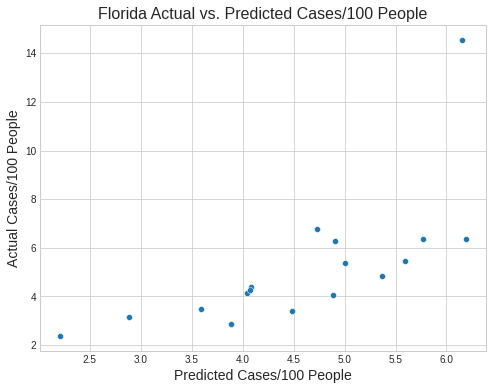

In [12]:
# Plot the predicted versus the actual 'cases_per_100_people'.
plt.figure(figsize=(8,6))
sns.scatterplot(y_preds, y_test)
plt.title('Florida Actual vs. Predicted Cases/100 People', fontsize=16)
plt.xlabel('Predicted Cases/100 People', fontsize=14)
plt.ylabel('Actual Cases/100 People', fontsize=14);

In [13]:
# Extract the features of X.
features = X_train.columns

In [14]:
# Extract the coefficients for the features used in the best model.
coefs = gs.best_estimator_.named_steps['ridge'].coef_

In [15]:
# Create a dataframe of the features and their coefficients.
coef_df = pd.DataFrame(list(zip(features, coefs)), columns=['Feature', 'Coefficients'])
coef_df = coef_df.set_index('Feature')
coef_df = coef_df.sort_values(by='Coefficients', ascending=False)

In [16]:
# Rename the index.
coef_df = coef_df.rename(index={
    'inc_per_capita_inc_dol': 'Income Per Capita ($)',
    'percent_inc_hhlds_less_than_99_999': 'Income: < $100,000',
    'percent_inc_hhlds_100_000_or_more': 'Income: > $100,000',
    'obes_percent': 'Obesity (%)',
    'pop_density': 'Population Density',
    'percent_health_ins_noninst_pop_cov_no': 'Health Insurance: None (%)',
    'percent_sex_age_pop_male': 'Sex: Male (%)',
    'percent_sex_age_pop_under_5': 'Age: Under 5 Yrs (%)',
    'percent_sex_age_pop_5_to_9': 'Age: 5-9 Yrs (%)',
    'percent_sex_age_pop_10_to_14': 'Age: 10-14 Yrs (%)',
    'percent_sex_age_pop_15_to_19': 'Age: 15-19 Yrs (%)',
    'percent_sex_age_pop_20_to_24': 'Age: 20-24 Yrs (%)',
    'percent_sex_age_pop_25_to_34': 'Age: 25-34 Yrs (%)',
    'percent_sex_age_pop_35_to_44': 'Age: 35-44 Yrs (%)',
    'percent_sex_age_pop_45_to_74': 'Age: 45-75 Yrs (%)',
    'percent_sex_age_pop_75_and_over': 'Age: 75+ Yrs (%)',
    'percent_sex_age_pop_0_to_44': 'Age: 0-44 Yrs (%)',
    'percent_race_pop_asian_alone': 'Race: Asian (%)',
    'percent_race_pop_american_indian_and_alaska_native_alone': 'Race: American Indian/Alaskan (%)',
    'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone': 'Race: Pacific Islander (%)',
    'percent_race_pop_black_or_african_american_alone': 'Race: Black/African American (%)',
    'percent_race_pop_hispanic_or_latino_of_any_race': 'Race: Hispanic/Latino (%)',
    'percent_race_pop_two_or_more_races': 'Race: Two or More Races (%)',
    'percent_race_pop_white_alone': 'Race: White (%)',
    'tests_per_100_people': 'Tests/100 People'
})

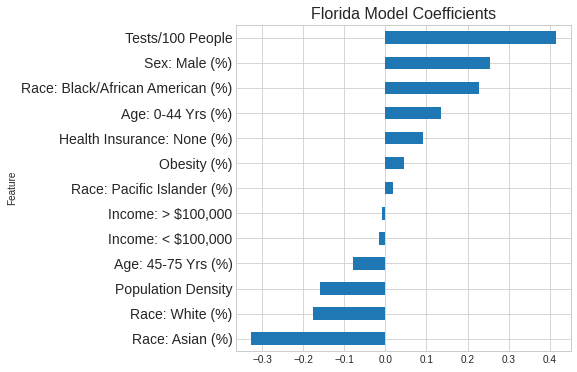

In [17]:
# Plot the datatframe of the features and their coefficients.
coef_df.sort_values(by='Coefficients').plot(kind = 'barh', figsize=(6,6), legend=None)
plt.title('Florida Model Coefficients', fontsize=16)
plt.yticks(fontsize=14);

### Create a smaller coefficient dataframe

In [18]:
# Extract the top 10 coefficients.
coef_neg = coef_df.sort_values(by='Coefficients')[:5]
coef_pos = coef_df.sort_values(by='Coefficients', ascending=False)[:5]
coef_df = pd.concat([coef_neg, coef_pos]).sort_values(by='Coefficients', ascending=False)

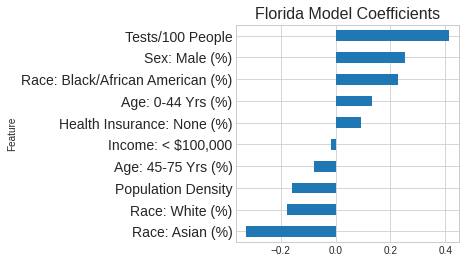

In [19]:
# Plot the datatframe of the features and their coefficients.
coef_df.sort_values(by='Coefficients').plot(kind = 'barh', figsize=(4,4), legend=None)
plt.title('Florida Model Coefficients', fontsize=16)
plt.yticks(fontsize=14);

# Classification Model: Best

This model was achieved 71% accuracy with 71% baseline.

In [20]:
# Assign our features to X and y.
X = df[[
    'inc_per_capita_inc_dol',
    'percent_sex_age_pop_male',
    'obes_percent',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_race_pop_asian_alone',
    'percent_inc_hhlds_less_than_99_999',
    'percent_inc_hhlds_100_000_or_more',
    'percent_health_ins_noninst_pop_cov_yes',
    'pop_density',
    'percent_race_pop_white_alone',
    'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
    'percent_race_pop_black_or_african_american_alone',
    'tests_per_100_people'
]]

y = df['covid_severity']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [21]:
# Display the shape of the training and test data.
X_train.shape, X_test.shape

((50, 14), (17, 14))

In [22]:
# Display the baseline percentages.
y_test.value_counts(normalize=True)

3    0.705882
2    0.235294
1    0.058824
Name: covid_severity, dtype: float64

In [23]:
# Create a pipeline.
pipe = make_pipeline(QuantileTransformer(), SelectKBest(), LogisticRegression())

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,21),
    'logisticregression__C': [.1, .5, 1, 10]
}

# Set up GridSearchCV with the pipe.
gs = GridSearchCV(pipe, param_grid=params, cv=10, n_jobs=-1)

In [24]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('quantiletransformer',
                                        QuantileTransformer()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.5, 1, 10],
                         'selectkbest__k': range(1, 21)})

In [25]:
# Display the best parameters.
gs.best_params_

{'logisticregression__C': 10, 'selectkbest__k': 4}

In [26]:
# Display the score for the test set.
print(f'Test Accuracy: {round(gs.score(X_test, y_test), 4)}.')

Test Accuracy: 0.7647.


In [27]:
# Display the score for the training set.
print(f'Train Accuracy: {round(gs.score(X_train, y_train), 4)}.')

Train Accuracy: 0.88.


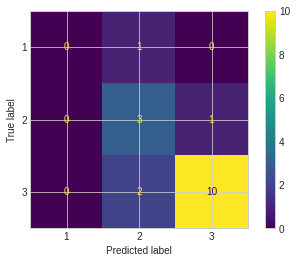

In [28]:
# Plot a confusion matrix.
y_preds = gs.predict(X_test)
plot_confusion_matrix(gs, X_test, y_test);